In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))

2023-04-08 13:16:54.944068: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


1


2023-04-08 13:17:22.134006: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-08 13:17:22.135458: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-08 13:17:22.173832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 13:17:22.174066: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-04-08 13:17:22.174106: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-08 13:17:22.221971: I tensorflow/stream_executor/platform/def

In [3]:
## Defining batch specfications
batch_size = 100
img_height = 256
img_width = 256

In [4]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)


Found 70295 files belonging to 38 classes.


2023-04-08 13:17:33.125281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 13:17:33.125594: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-08 13:17:33.125765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 13:17:33.125949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43Gi

In [5]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
   'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [6]:
class_names = training_ds.class_names

In [12]:
#training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [10]:
## lets train our CNN
history = model.fit(training_ds,validation_data=validation_ds,callbacks=callbacks,epochs = 10)

Epoch 1/10


2023-04-08 13:17:41.452058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-08 13:17:41.454667: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800500000 Hz
2023-04-08 13:17:41.526616: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-08 13:17:51.538879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 239 of 800
2023-04-08 13:18:01.533842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 678 of 800
2023-04-08 13:18:04.403224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2023-04-08 13:18:06.393320: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-08 13:18:07.047665: W tensorf

703/703 [==============================] - ETA: 0s - loss: 1.8469 - accuracy: 0.5261

2023-04-08 13:50:06.517676: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 561 of 800
2023-04-08 13:50:09.897385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 2208s 3s/step - loss: 1.8458 - accuracy: 0.5263 - val_loss: 0.5303 - val_accuracy: 0.8301
Epoch 2/10
703/703 [==============================] - 593s 835ms/step - loss: 0.4418 - accuracy: 0.8595 - val_loss: 0.3165 - val_accuracy: 0.8967
Epoch 3/10


2023-04-08 14:04:31.534189: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 608 of 800
2023-04-08 14:04:32.109917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 830s 1s/step - loss: 0.2221 - accuracy: 0.9249 - val_loss: 0.3078 - val_accuracy: 0.9042
Epoch 4/10
703/703 [==============================] - 755s 1s/step - loss: 0.1226 - accuracy: 0.9596 - val_loss: 0.3261 - val_accuracy: 0.9066
Epoch 5/10


2023-04-08 14:30:56.818509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 328 of 800
2023-04-08 14:31:06.794492: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 578 of 800
2023-04-08 14:31:10.972868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 1038s 1s/step - loss: 0.0955 - accuracy: 0.9675 - val_loss: 0.2886 - val_accuracy: 0.9179
Epoch 6/10


2023-04-08 14:48:14.473957: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 542 of 800
2023-04-08 14:48:17.470472: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 1964s 3s/step - loss: 0.0668 - accuracy: 0.9772 - val_loss: 0.3214 - val_accuracy: 0.9146
Epoch 7/10


2023-04-08 15:20:58.442195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 429 of 800
2023-04-08 15:21:05.083001: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - ETA: 0s - loss: 0.0609 - accuracy: 0.9801

2023-04-08 15:50:27.328841: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 668 of 800
2023-04-08 15:50:28.537543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 1999s 3s/step - loss: 0.0609 - accuracy: 0.9801 - val_loss: 0.3661 - val_accuracy: 0.9130
Epoch 8/10


2023-04-08 15:54:17.764868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 472 of 800
2023-04-08 15:54:23.184083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


703/703 [==============================] - 1736s 2s/step - loss: 0.0599 - accuracy: 0.9800 - val_loss: 0.3253 - val_accuracy: 0.9208
Epoch 00008: early stopping


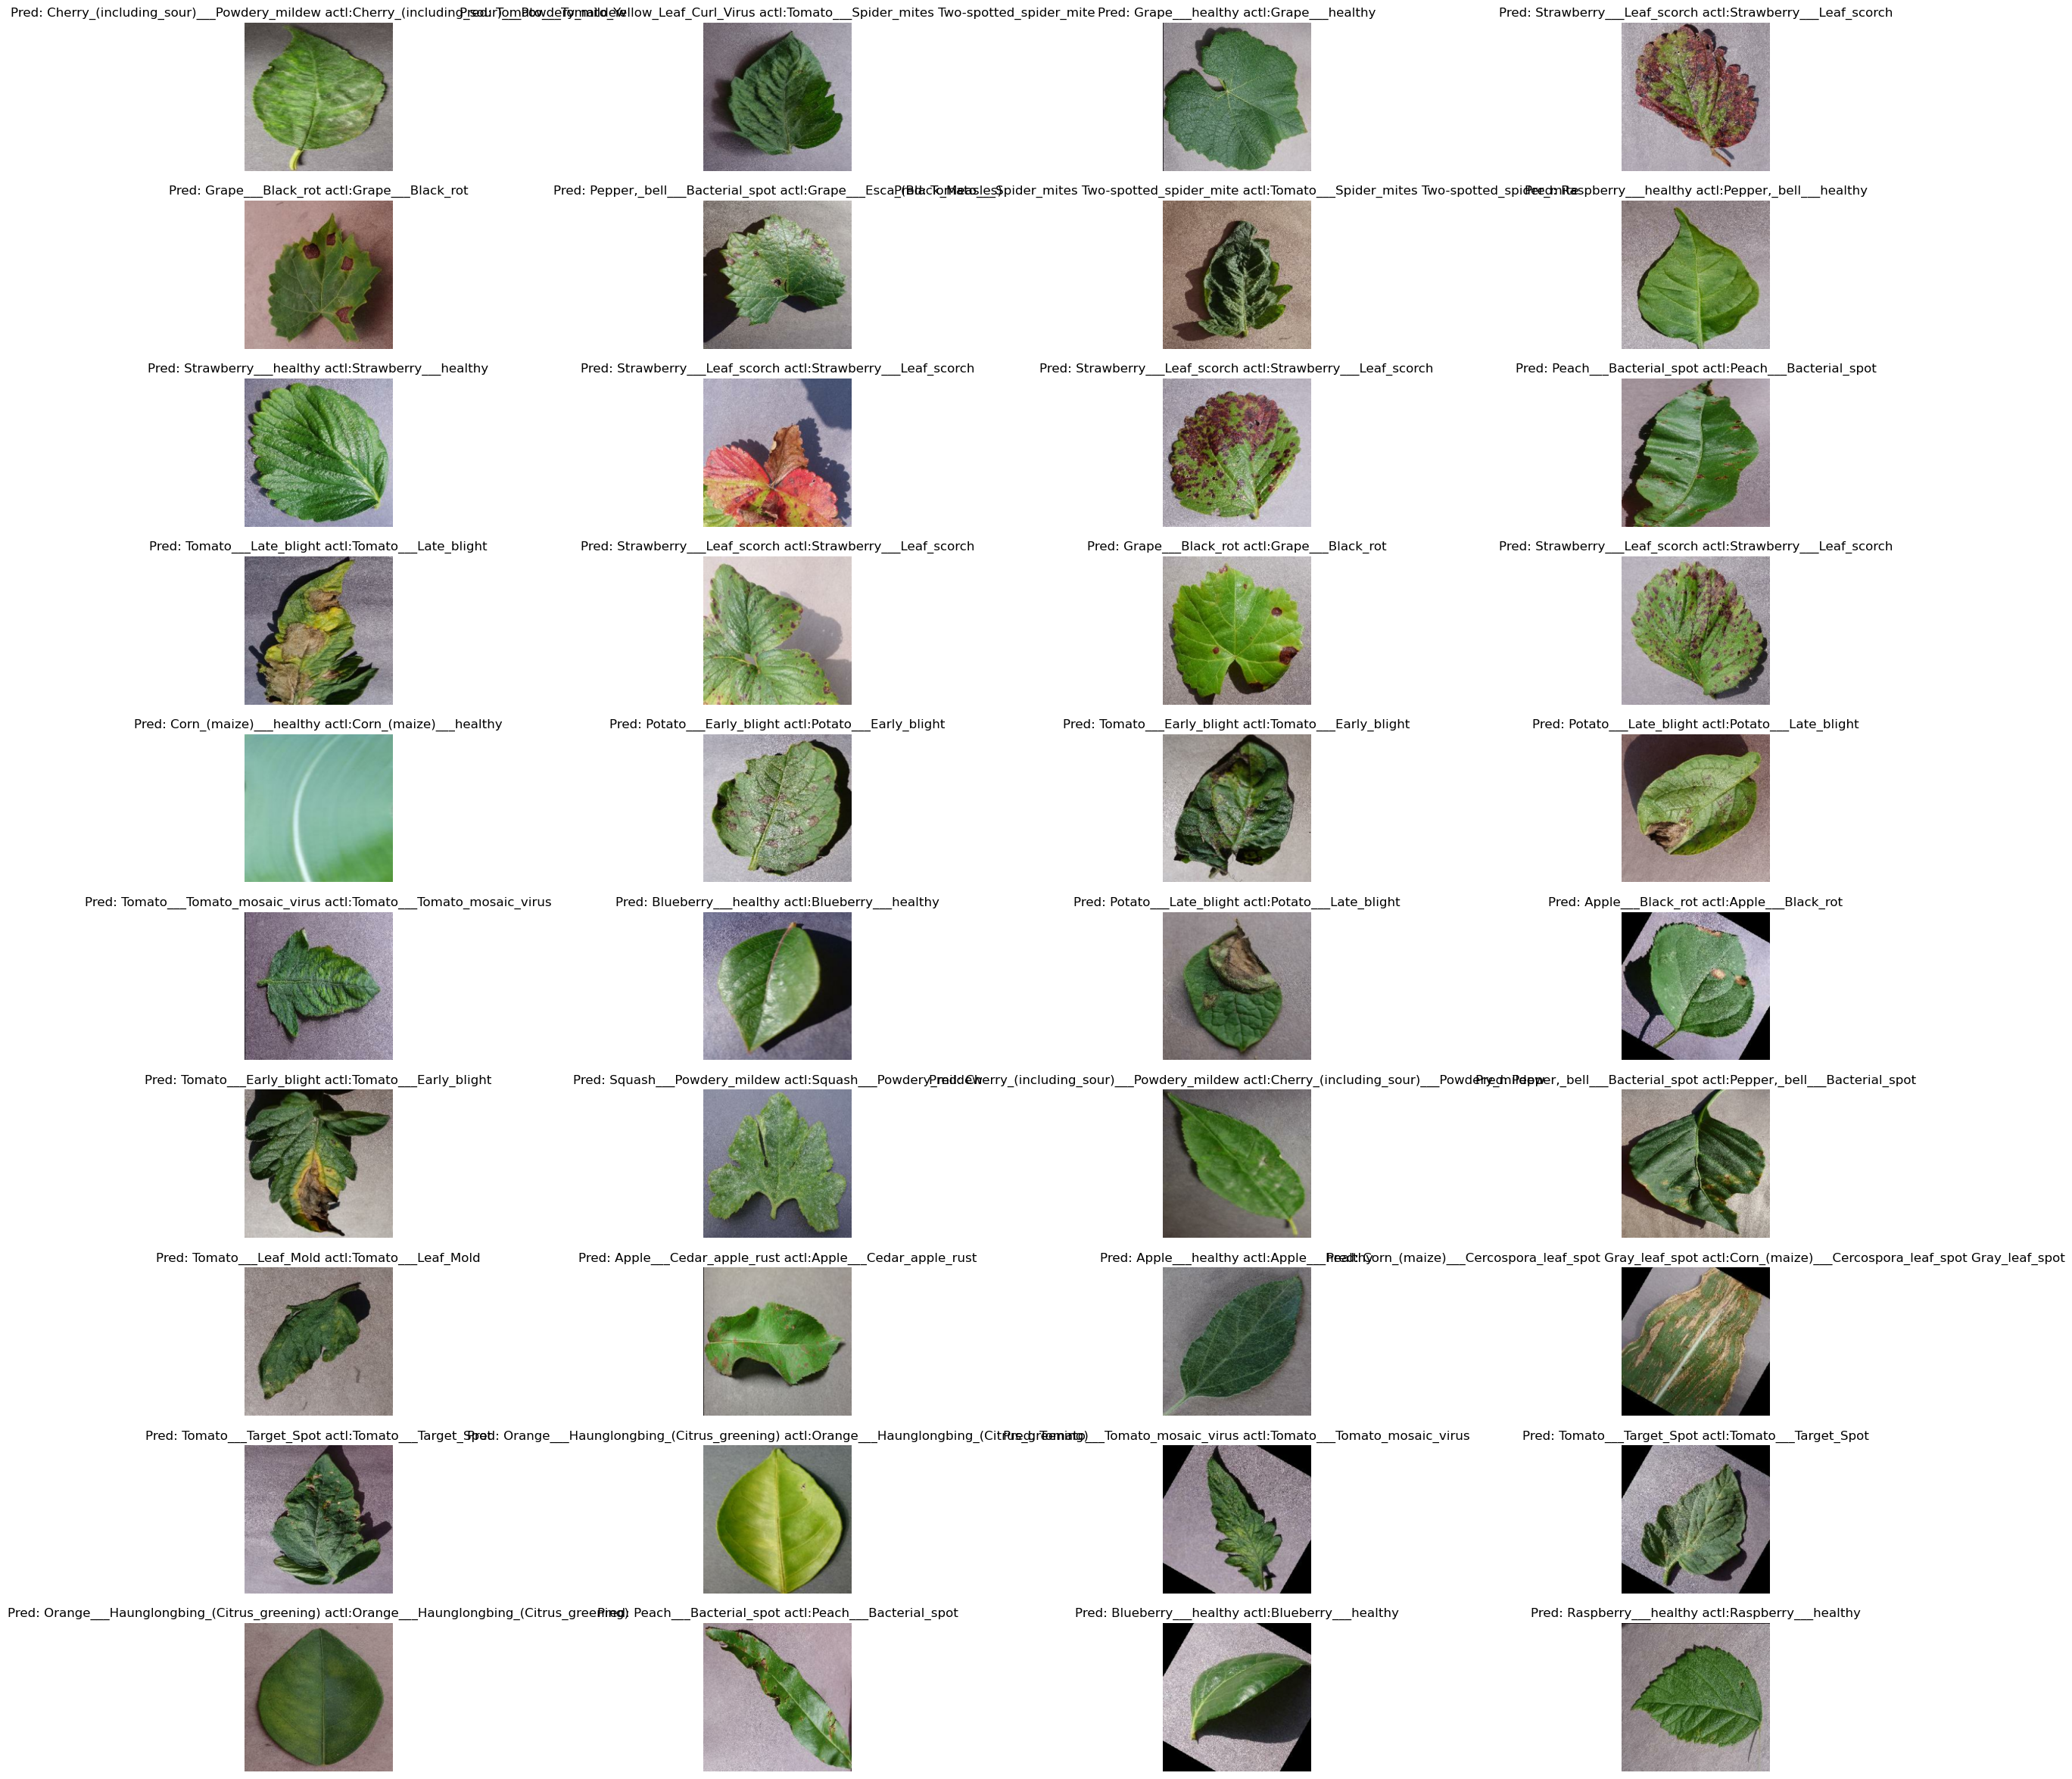

In [32]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)

In [17]:
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)

2023-04-08 17:00:05.525008: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 677 of 800
2023-04-08 17:00:07.202953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


In [33]:
for x,y in validation_ds.take(1):
    print(np.max(model.predict(x),axis=1)*100)

[100.        99.92011   99.9995    99.99672   95.1691   100.
  99.78005   99.9997    99.98665   99.96093  100.        86.755684
 100.        99.99993   99.98364   59.693413  99.990555  99.999985
  65.33012  100.        99.99776   99.999916  63.607067  99.982254
 100.        99.554214  99.99988   99.970825  99.897514  93.72962
  99.14273   99.98228   99.71222   58.74198   97.14632   99.29327
 100.        96.243835  99.99701   99.999985 100.       100.
  95.15707   44.151955  99.99969  100.        74.88902   99.99971
  99.98305  100.       100.        78.52572  100.        99.9996
  99.29755   99.99988   99.91606  100.       100.        99.99907
 100.        99.995735  92.51287   99.62885   99.997696  99.94324
  87.902824  58.91414  100.        99.6412    79.764725  99.9975
  99.99998   99.98728   55.624752  99.99958   99.997154  99.55522
  99.99894   99.99557   99.99945   96.16217   99.18517   99.99936
  96.70523  100.        99.999916  99.99994   99.999985  99.99987
  99.99996   59.402

In [48]:
from tensorflow.keras.models import load_model
import cv2 as cv
model = load_model('model.h5')

In [71]:
path = 'dataset/test/test'
for i in os.listdir(path):
    img = cv.imread(os.path.join(path,i))
    img = cv.resize(img,(250,250))
    img = img.reshape(1,250,250,3)
    print("actual :"+ i + " Pred : " + class_names[np.argmax(model.predict(img))])
    print("accuracy : ",np.max(model.predict(img)) * 100)

actual :AppleCedarRust1.JPG Pred : Tomato___Leaf_Mold
accuracy :  69.9861228466034
actual :AppleCedarRust2.JPG Pred : Tomato___Leaf_Mold
accuracy :  97.40685224533081
actual :AppleCedarRust3.JPG Pred : Tomato___Leaf_Mold
accuracy :  99.22165870666504
actual :AppleCedarRust4.JPG Pred : Tomato___Leaf_Mold
accuracy :  92.64717698097229
actual :AppleScab1.JPG Pred : Tomato___Tomato_Yellow_Leaf_Curl_Virus
accuracy :  76.70447826385498
actual :AppleScab2.JPG Pred : Orange___Haunglongbing_(Citrus_greening)
accuracy :  67.98210740089417
actual :AppleScab3.JPG Pred : Potato___Early_blight
accuracy :  99.8983085155487
actual :CornCommonRust1.JPG Pred : Apple___healthy
accuracy :  99.99593496322632
actual :CornCommonRust2.JPG Pred : Pepper,_bell___healthy
accuracy :  77.92920470237732
actual :CornCommonRust3.JPG Pred : Apple___healthy
accuracy :  57.473260164260864
actual :PotatoEarlyBlight1.JPG Pred : Potato___Early_blight
accuracy :  99.96408224105835
actual :PotatoEarlyBlight2.JPG Pred : Tomat

In [60]:
os.listdir(path)

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']